<a href="https://colab.research.google.com/github/VindaShinde/ML-basic_Models/blob/main/Report_Vinda_K_Mean_on_movie_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram
 
import pandas as pd
import numpy as np
from pandas import DataFrame

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)
 
%matplotlib inline

# 1) Objective of the Project

The overall data is obtained from class of 2021 students of UOPI, San Francisco from Data Science course. The data set contains the ratings for different categories of movies based on students likings from 1 to 10.One of the column represent movie categories and in last contains the movies watched by stuents in terms of per week, movies preffered, and described about themselves.

The Data Science program wants to organize a movie night for the Masters students. And wants to better understand the students preferences.they also want to know if they could make predictions on new students based on the model created.

Therefore, In this report im going to predict about how many movies are they going to watch in a week.

In [ ]:
Movies_data = pd.read_csv('Class_2020_10_15__01_33_QZ_Movies, Movies & Movies.csv')
Movies_data.head(3)

        Student Name  Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)  Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)  Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)  Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)  Using a scale 1 to 10, how much do you like drama movies?  Using a scale 1 to 10, how much do you like fantasy movies?  Using a scale 1 to 10, how much do you like science fiction movies?  Using a scale 1 to 10, how much do you like horror movies?  Using a scale 1 to 10, how much do you like mystery movies?  Using a scale 1 to 10, how much do you like romance movies?  Using a scale 1 to 10, how much do you like thriller movies?  Using a scale 1 to 10, how much do you like documentary movies?  Using a scale 1 to 10, how much do you like animated movies? On average, how many movies you watch on a single week  \
0  Chao, Christophe

# 2) Data Exploration

In [ ]:
Movies_data.columns = ["Name","Action","Adventure","Comedy","Crime","Drama","Fantacy","Fiction","Horror","Mystery","Romance","Thriller","Documentary","Animated","Weekly","Preferred","Description"]

Renamed the columns


In [ ]:
Movies_data.head()

                   Name  Action  Adventure   Comedy   Crime     Drama  Fantacy    Fiction   Horror   Mystery   Romance  Thriller  Documentary   Animated                           Weekly                   Preferred                              Description
0     Chao, Christopher     7.0       8.30   6.2000  6.2000  4.200000  7.40000   8.900000  1.00000  7.500000  2.100000   7.90000     7.600000   9.500000           B. 2) One movie a week                    B. Shrek                                    Happy
1          Chen, Yu-Wen     9.0       7.80   9.8000  9.6300  6.300000  9.85000   7.500000  1.20000  7.845000  9.850000   6.38000     7.800000   8.650000          C. 3) Two movies a week                D. Spiderman                                 Friendly
2          Chen, Ziheng     NaN       9.00  10.0000  7.0000  2.000000  6.00000   3.000000  9.00000       NaN  2.000000   9.00000     4.000000   7.000000           B. 2) One movie a week  A. Star Wars\nD. Spiderman                      

In [ ]:
Movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         40 non-null     object 
 1   Action       32 non-null     float64
 2   Adventure    32 non-null     float64
 3   Comedy       30 non-null     float64
 4   Crime        32 non-null     float64
 5   Drama        32 non-null     float64
 6   Fantacy      33 non-null     float64
 7   Fiction      32 non-null     float64
 8   Horror       32 non-null     float64
 9   Mystery      31 non-null     float64
 10  Romance      32 non-null     float64
 11  Thriller     32 non-null     float64
 12  Documentary  32 non-null     float64
 13  Animated     32 non-null     float64
 14  Weekly       33 non-null     object 
 15  Preferred    31 non-null     object 
 16  Description  33 non-null     object 
dtypes: float64(13), object(4)
memory usage: 5.4+ KB


In [ ]:
Movies_data.Weekly.unique()

array(['B. 2) One movie a week', 'C. 3) Two movies a week',
       'E. 5) More than 4 movies a week', nan,
       "A. 1) zero movies. I don't watch movies",
       'D. 4) Three to four movies a week'], dtype=object)

In [ ]:
Movies_data.Weekly.replace(("""A. 1) zero movies. I don't watch movies""",
                            "B. 2) One movie a week","C. 3) Two movies a week","D. 4) Three to four movies a week",
                            "E. 5) More than 4 movies a week"),(0,1,2,3,4), inplace=True)

Renamed the Weekly column to get into numbers format. It has 5 different choices selected by the students.

In [ ]:
weekly_mode = Movies_data.Weekly.mode().values[0]
Movies_data.Weekly.fillna(weekly_mode,inplace=True)

Movies_data.Weekly.isna().sum()

0

Replaced the Nan values with the **mode** value of weekly column as it is assumed that, rest of students may also have similar trends as they all belong to student group.

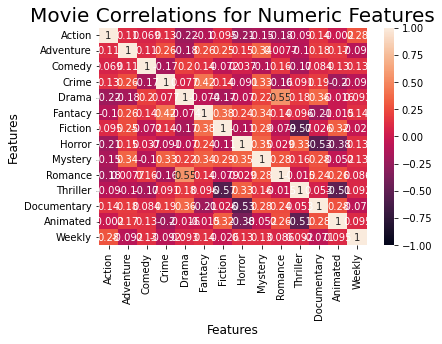

In [ ]:
# to find correlation within movies
corr = Movies_data.corr()
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Movie Correlations for Numeric Features', size=20)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

To find if there are any correlation between different movie types to create a logical group of few selective columns.

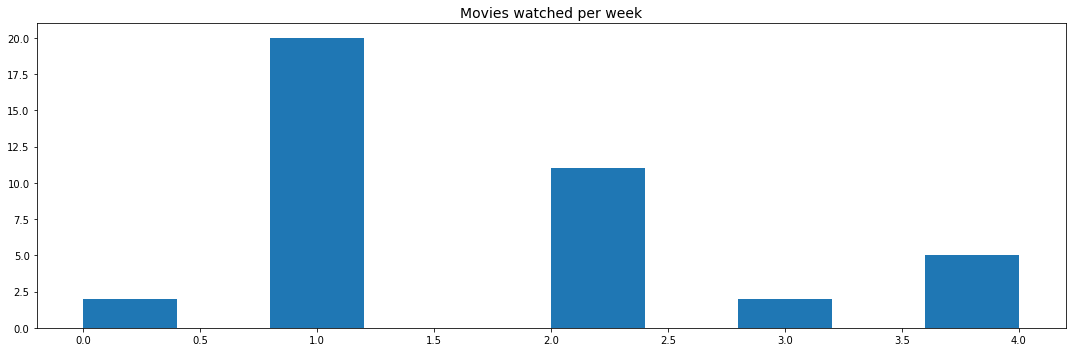

In [ ]:
#hist plot for count on movies per week
plt.figure(figsize=(15,5))
plt.hist(Movies_data.Weekly)
plt.title('Movies watched per week', fontsize=14)
plt.tight_layout()

In [ ]:
Movies_data.describe()

          Action  Adventure     Comedy      Crime      Drama    Fantacy    Fiction     Horror    Mystery    Romance   Thriller  Documentary   Animated     Weekly
count  32.000000  32.000000  30.000000  32.000000  32.000000  33.000000  32.000000  32.000000  31.000000  32.000000  32.000000    32.000000  32.000000  40.000000
mean    8.271875   7.781777   7.898884   6.624312   5.326987   6.430874   7.959565   4.202194   6.309411   4.967958   5.960931     6.029592   6.615307   1.700000
std     1.530599   1.981842   2.021029   2.821408   2.781892   2.778051   2.714946   3.244342   2.780907   2.902380   2.808752     2.871725   2.487203   1.090754
min     4.500000   2.100000   2.500000   0.300000   0.000000   1.000000   1.200000   0.100000   1.000000   0.116541   1.000000     1.000000   1.000000   0.000000
25%     7.000000   6.692500   7.200000   5.100000   3.000000   4.800000   6.609429   1.177775   5.127406   2.250000   3.925000     4.000000   5.000000   1.000000
50%     8.400000   8.055556 

It is observed that on and avearge 1.7 movies watched by the UOP students. There are different types of movies watched by these students and out of that, I see some correlation between movies type like: 'Comedy','Drama','Fantacy','Horror'. So I am creating a new dataframe for this set.

In [ ]:
movies_df_1 = Movies_data[['Comedy','Drama','Fantacy','Horror']]
movies_df_1.dropna(inplace=True)
movies_df_1 = movies_df_1.astype(int)

movies_df_1.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


   Comedy  Drama  Fantacy  Horror
0       6      4        7       1
1       9      6        9       1
2      10      2        6       9
4       9      9        9       5
5       7      3        4       2

# 3) Dendrogram

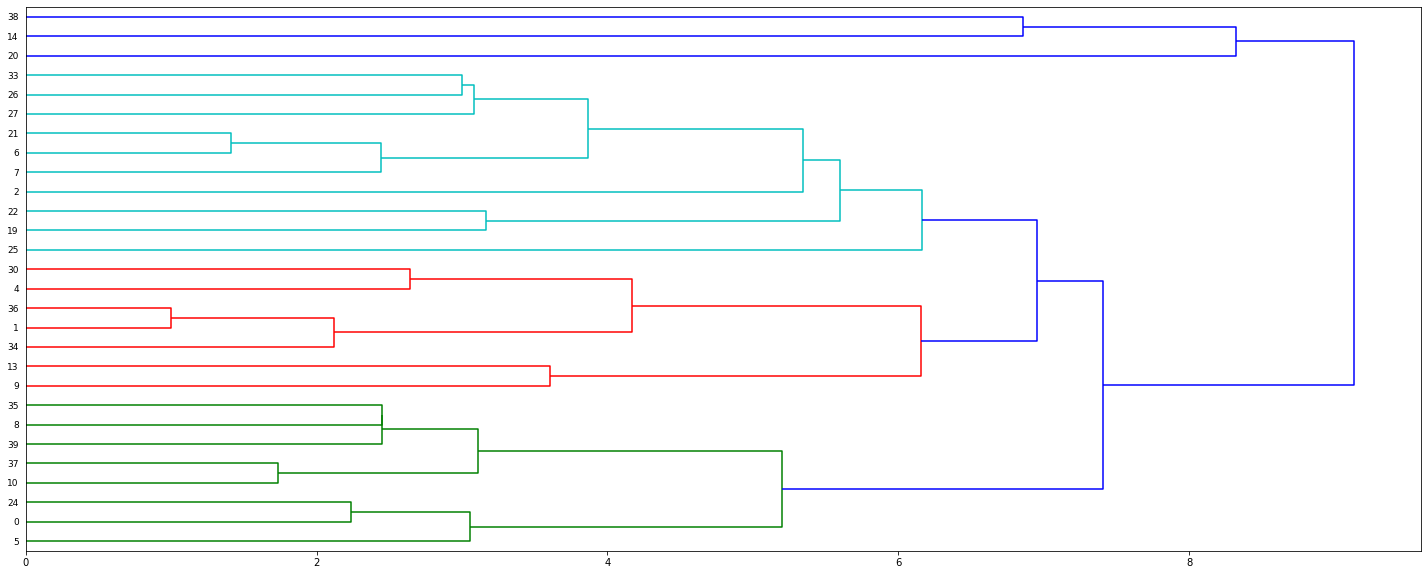

In [ ]:
Z = linkage(movies_df_1, 'average')
plt.figure(figsize=(25, 10))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=9, labels = movies_df_1.index)

The clusters from the above graphs are mainly 4, so will use these for further analysis.

In [ ]:
# To see more details of the clusters 
from scipy.cluster.hierarchy import fcluster
k=5
dend_clusters = fcluster(Z, k, criterion='maxclust')

for i in range(1, k):
    print("\nCluster", i)
    display(movies_df_1[dend_clusters == i])


Cluster 1


    Comedy  Drama  Fantacy  Horror
0        6      4        7       1
5        7      3        4       2
8        7      5        1       2
10       8      8        3       1
24       8      4        6       1
35       6      6        3       2
37       8      7        2       0
39       6      7        1       1


Cluster 2


    Comedy  Drama  Fantacy  Horror
1        9      6        9       1
4        9      9        9       5
9        4      8        9       1
13       4      8        6       3
30      10      7        8       4
34       9      8        9       1
36       9      6       10       1


Cluster 3


    Comedy  Drama  Fantacy  Horror
2       10      2        6       9
6        9      5        7       5
7        8      3        7       5
19       7      5        8      10
21       9      5        8       4
22       7      8        8       9
25      10     10        5       8
26       8      6        4       5
27      10      7        5       7
33       8      5        6       7


Cluster 4


    Comedy  Drama  Fantacy  Horror
14       3      0        7       2
38       9      1       10       3

The 4 clusters details are printed above, these clusters shows some similarities among then and hence to see what are those I have printed these clusters values.

# 4) Step-by-step K-means

In [ ]:
# Add Random centroids
centroid1 = np.array([2,6,5,7])
centroid2 = np.array([8,5,4,6])
centroid3 = np.array([10,7,5, 3])
centroid4 = np.array([5,4,3,2])
print(centroid1, centroid2, centroid3,centroid4)

[2 6 5 7] [8 5 4 6] [10  7  5  3] [5 4 3 2]


To start with the clustering's first iteration, I will need to add random cetrorids for the k clusters. Here I have k=4 hence 4 centroids and since I have 4 features, every centroid has 4 values in it.

In [ ]:
# To test 1st iteration
movies_df_1["Dist_C1"] = np.sqrt((movies_df_1.Comedy - centroid1[0])**2 
                             + (movies_df_1.Drama- centroid1[1])**2
                             + (movies_df_1.Fantacy- centroid1[2])**2
                             + (movies_df_1.Horror- centroid1[3])**2)

movies_df_1["Dist_C2"] = np.sqrt((movies_df_1.Comedy - centroid2[0])**2 
                             + (movies_df_1.Drama- centroid2[1])**2
                             + (movies_df_1.Fantacy- centroid2[2])**2
                             + (movies_df_1.Horror- centroid2[3])**2)

movies_df_1["Dist_C3"] = np.sqrt((movies_df_1.Comedy - centroid3[0])**2 
                             + (movies_df_1.Drama- centroid3[1])**2
                             + (movies_df_1.Fantacy- centroid3[2])**2
                             + (movies_df_1.Horror- centroid3[3])**2)

movies_df_1["Dist_C4"] = np.sqrt((movies_df_1.Comedy - centroid4[0])**2 
                             + (movies_df_1.Drama- centroid4[1])**2
                             + (movies_df_1.Fantacy- centroid4[2])**2
                             + (movies_df_1.Horror- centroid4[3])**2)

# Associating points to centroid

movies_df_1["Association"] = np.where(
    (movies_df_1.Dist_C1 < movies_df_1.Dist_C2) & 
    (movies_df_1.Dist_C1 < movies_df_1.Dist_C3) & 
    (movies_df_1.Dist_C1 < movies_df_1.Dist_C4),1,

     np.where((movies_df_1.Dist_C2 < movies_df_1.Dist_C1) & 
    (movies_df_1.Dist_C2 < movies_df_1.Dist_C3) &
    (movies_df_1.Dist_C2 < movies_df_1.Dist_C4), 2,
    
     np.where((movies_df_1.Dist_C3 < movies_df_1.Dist_C1) & 
    (movies_df_1.Dist_C3 < movies_df_1.Dist_C2) &
    (movies_df_1.Dist_C3 < movies_df_1.Dist_C4), 3,4)))


movies_df_1.head()

   Comedy  Drama  Fantacy  Horror    Dist_C1   Dist_C2   Dist_C3   Dist_C4  Association
0       6      4        7       1   7.745967  6.244998  5.744563  4.242641            4
1       9      6        9       1  10.049876  7.211103  4.690416  7.549834            3
2      10      2        6       9   9.219544  5.099020  7.874008  9.327379            2
4       9      9        9       5   8.831761  6.557439  5.000000  9.273618            3
5       7      3        4       2   7.745967  4.582576  5.196152  2.449490            4

As shown in the above code the distance for every cluster with its centriod is added in new columns. Also the association column is added which shows the cluster number to which each students record represents.

# 5) sklearn.cluster way of finding clusters


In [ ]:
movies_df_1_ = Movies_data[['Comedy','Drama','Fantacy','Horror']]
movies_df_1_.dropna(inplace=True)
movies_df_1_ = movies_df_1_.astype(int)
movies_df_1_.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


   Comedy  Drama  Fantacy  Horror
0       6      4        7       1
1       9      6        9       1
2      10      2        6       9
4       9      9        9       5
5       7      3        4       2

Reconfiguring the dataset to get to its original state of 4 features as I want to make model for the same data set with the K-means clustering direct function.

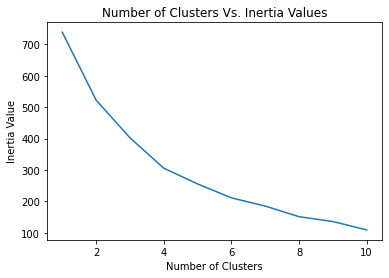

In [ ]:
#Initialize a list of clusters from 1 to 10 clusters 

clusters = [1,2,3,4,5,6,7,8,9,10]

#Create an empty list in order to store the inertia values 

inertia_values = []

for cluster in clusters:
    
    #Build a k-means model for each cluster value
    
    k_means = KMeans(n_clusters = cluster)
    
    #Fit the model to the data
    
    k_means.fit(movies_df_1_)
    
    # Store inertia value of each model into the empty list 
    
    inertia_values.append(k_means.inertia_)
    
# Plot the result

sns.lineplot(x = clusters, y = inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Number of Clusters Vs. Inertia Values')
plt.show()

The way to find how many clusters to keep, I have plotted the Inertia values against the Number of clusters to find the Elbow point.

In [ ]:
#Initializing K-means with 4 clusters

k_means_model = KMeans(n_clusters = 4)

#Fitting the model on the data

k_means_model.fit(movies_df_1_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Inertia of present model

k_means_model.inertia_

306.34761904761905

In [ ]:
#Extracting labels 

target_labels = k_means_model.predict(movies_df_1_)

#Printing the labels

target_labels
movies_df_1_.head()

   Comedy  Drama  Fantacy  Horror
0       6      4        7       1
1       9      6        9       1
2      10      2        6       9
4       9      9        9       5
5       7      3        4       2

### After plotting the k values for 10 values the **Elbow point is observed at value 4** so our prediction with K=4 is reasonable to do further predictions.

# 6) Prediction

In [ ]:
def predict_weekly_movies (Comedy,Drama,Fantacy,Horror):
  
  classification = ["Coupon_Group_1", "Coupon_Group_2", "Coupon_Group_3", "Coupon_Group_4"]

  print("Please select the rating from (1/10) for below movie choice:")
  Comedy = input("COMEDY ")
  Drama = input("DRAMA ")
  Fantacy = input("FANTACY ")
  Horror = input("HORROR ")

  print("\nThe Coupon for your movie night is here:\n")
  Weekly_movies = k_means.predict(np.array([Comedy,Drama,Fantacy,Horror]).reshape(1, -1))[0]
  
  return classification[Weekly_movies]

I have created a function **predict_weekly_movies** which takes data from students and accordingly predicts, how many movies this student whose data is entered watches weekly. 

In [ ]:
for i in range(0,2):
  print("Hello, Student",i," Welcome to the movie night celebration!\n")
  coupon = predict_weekly_movies(Comedy,Drama,Fantacy,Horror)
  print(coupon)


In [ ]:
predict_weekly_movies(Comedy,Drama,Fantacy,Horror)

Please select the rating from (1/10) for below movie choice:
COMEDY 4
DRAMA 4
FANTACY 5
HORROR 6

The Coupon for your movie night is here:



'Coupon_Group_1'

# 7) Summary

The model has predicted that for the UOP movie night, 4 groups (clusters)to be created. (This information is derived from the way we have found the Elbow points). The students can be divided into main 4 groups and each student can get into particular group. The group student will be part of depends on the choises student selects for the questions given, and accordingly will get the coupon to that group.